# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Muhammad Reza Al Fatah]
- **Email:** [muhammadrezaalfatah09gmail.com]
- **ID Dicoding:** [muhammad_reza_al-fatah_mqk5]

## Menentukan Pertanyaan Bisnis

- Faktor apa saja yang menunjukkan kualitas udara
- Bagaimana pengaruh peningkatan konsentrasi partikel halus (PM2.5) dan partikel kasar (PM10) terhadap kualitas udara?
- Pada Kondsi temperature apa saja udara apa menjukan kualitas baik 


## Import Semua Packages/Library yang Digunakan

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [11]:
data=pd.read_csv('data.csv')

In [12]:
data.shape

(35064, 20)

**Insight:**
- data set yang digunakan memilki dimensi data 35064 baris data dan 18 kolom

### Assessing Data

In [13]:
data.describe()

,No,year,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,Kualitas_Udara
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1.262945,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496,1.856291
std,10122.249256,1.177213,8.800218,6.922285,81.045038,94.243001,22.516658,36.570739,1.190100,56.478782,11.395845,10.401079,13.684991,0.909796,1.203831,0.759032
min,1.000000,2013.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,0.100000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000,1.000000
25%,8766.750000,2014.000000,8.000000,5.750000,23.000000,39.000000,3.000000,31.000000,0.500000,9.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000,1.000000
50%,17532.500000,2015.000000,16.000000,11.500000,61.000000,89.000000,9.000000,55.000000,0.900000,46.000000,14.500000,1011.400000,3.800000,0.000000,1.400000,2.000000
75%,26298.250000,2016.000000,23.000000,17.250000,112.000000,153.000000,21.000000,81.000000,1.500000,80.000000,23.300000,1020.100000,15.600000,0.000000,2.200000,2.000000
max,35064.000000,2017.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000,3.000000


In [14]:
data.isna().sum()

No                0
year              0
month             0
day               0
hour              0
PM2.5             0
PM10              0
SO2               0
NO2               0
CO                0
O3                0
TEMP              0
PRES              0
DEWP              0
RAIN              0
wd                0
WSPM              0
station           0
Kualitas_Udara    0
TEMP_Category     0
dtype: int64

In [15]:
data.duplicated().sum()

0

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   No              35064 non-null  int64  
 1   year            35064 non-null  int64  
 2   month           35064 non-null  object 
 3   day             35064 non-null  int64  
 4   hour            35064 non-null  int64  
 5   PM2.5           35064 non-null  float64
 6   PM10            35064 non-null  float64
 7   SO2             35064 non-null  float64
 8   NO2             35064 non-null  float64
 9   CO              35064 non-null  float64
 10  O3              35064 non-null  float64
 11  TEMP            35064 non-null  float64
 12  PRES            35064 non-null  float64
 13  DEWP            35064 non-null  float64
 14  RAIN            35064 non-null  float64
 15  wd              35064 non-null  object 
 16  WSPM            35064 non-null  float64
 17  station         35064 non-null 

In [17]:
data.sample(10)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Kualitas_Udara,TEMP_Category
25617,25618,2016,Februari,1,9,25.000000,48.0,19.0,69.000000,1.500000,15.000000,-3.6,1033.0,-18.3,0.0,North-East,2.2,Aotizhongxin,2,Dingin
25372,25373,2016,Januari,22,4,9.000000,20.0,4.0,23.000000,0.700000,56.353358,-7.6,1035.6,-23.8,0.0,North-North-West,3.8,Aotizhongxin,1,Dingin
33262,33263,2016,Desember,15,22,29.000000,44.0,16.0,86.000000,1.300000,2.000000,-2.6,1029.1,-12.9,0.0,South-East,0.1,Aotizhongxin,2,Dingin
7699,7700,2014,Januari,15,19,357.000000,470.0,196.0,167.000000,4.500000,1.000000,-1.9,1022.5,-8.9,0.0,West,1.7,Aotizhongxin,3,Dingin
25519,25520,2016,Januari,28,7,162.000000,174.0,72.0,59.305833,4.700000,10.000000,-6.1,1025.0,-17.0,0.0,North-East,1.1,Aotizhongxin,3,Dingin
6020,6021,2013,November,6,20,11.000000,84.0,3.0,13.000000,2.400000,49.266000,10.8,1015.4,-7.5,0.0,North-North-West,4.5,Aotizhongxin,3,Sejuk
26129,26130,2016,Februari,22,17,82.773611,45.0,2.0,12.000000,0.400000,84.000000,6.3,1023.6,-20.2,0.0,North-West,7.0,Aotizhongxin,2,Sejuk
26148,26149,2016,Februari,23,12,13.000000,19.0,6.0,7.000000,0.300000,78.000000,0.8,1035.7,-21.6,0.0,North,3.8,Aotizhongxin,1,Sejuk
2287,2288,2013,Juni,4,7,182.000000,207.0,12.0,45.000000,2.200000,137.000000,21.6,1007.0,17.2,0.0,East-South-East,2.6,Aotizhongxin,3,Hangat
6880,6881,2013,Desember,12,16,8.000000,26.0,5.0,10.000000,1.262945,47.338200,-0.7,1017.6,-21.5,0.0,North-North-West,2.9,Aotizhongxin,2,Dingin


**Insight:**
- setelah melakukan asesing data dapat di simpulkan data memilki nilai yang hilang 
- tidak nilai duplicat dalam dataframe
- beberapa nilai kosong
- dari sample yang di tampilkan terdapat beberapa kolom yang memilki value yang sebaik nya di ganti agar memudahkan pembacaan data frame

### Cleaning Data

In [18]:

meanPm = data['PM2.5'].mean()
data['PM2.5'].fillna(meanPm,inplace=True)

meanPm10 = data['PM10'].mean()
data['PM10'].fillna(meanPm10,inplace=True)

meanSO2 = data['SO2'].mean()
data['SO2'].fillna(meanSO2,inplace=True)

meanNO2 = data['NO2'].mean()
data['NO2'].fillna(meanNO2,inplace=True)

meanCO = data['CO'].mean()
data['CO'].fillna(meanCO,inplace=True)

meanO3 = data['O3'].mean()
data['O3'].fillna(meanO3,inplace=True)

meanTEMP = data['TEMP'].mean()
data['TEMP'].fillna(meanTEMP,inplace=True)

meanDEWP = data['DEWP'].mean()
data['DEWP'].fillna(meanDEWP,inplace=True)

meanRain = data['RAIN'].mean()
data['RAIN'].fillna(meanRain,inplace=True)

meanWSPM = data['WSPM'].mean()
data['WSPM'].fillna(meanWSPM,inplace=True)


meanPRES = data['PRES'].mean()
data['PRES'].fillna(meanPRES, inplace=True)

modeCategory = data['wd'].mode()[0]  # Mengambil nilai mode
data['wd'].fillna(modeCategory, inplace=True)  # Mengisi nilai NaN dengan mode


C:\Users\Reza\AppData\Local\Temp\ipykernel_12964\1878106851.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['PM2.5'].fillna(meanPm,inplace=True)
C:\Users\Reza\AppData\Local\Temp\ipykernel_12964\1878106851.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

In [19]:
data.isna().sum()

No                0
year              0
month             0
day               0
hour              0
PM2.5             0
PM10              0
SO2               0
NO2               0
CO                0
O3                0
TEMP              0
PRES              0
DEWP              0
RAIN              0
wd                0
WSPM              0
station           0
Kualitas_Udara    0
TEMP_Category     0
dtype: int64

In [20]:
bulan_mapping = {
    1: "Januari", 2: "Februari", 3: "Maret", 4: "April",
    5: "Mei", 6: "Juni", 7: "Juli", 8: "Agustus",
    9: "September", 10: "Oktober", 11: "November", 12: "Desember"
}
data['month'] = data['month'].replace(bulan_mapping)

ganti_nama_arah_angin = {
    'N': 'North',
    'NNE': 'North-North-East',
    'NE': 'North-East',
    'ENE': 'East-North-East',
    'E': 'East',
    'ESE': 'East-South-East',
    'SE': 'South-East',
    'SSE': 'South-South-East',
    'S': 'South',
    'SSW': 'South-South-West',
    'SW': 'South-West',
    'WSW': 'West-South-West',
    'W': 'West',
    'WNW': 'West-North-West',
    'NW': 'North-West',
    'NNW': 'North-North-West'
}


data['wd'] = data['wd'].replace(ganti_nama_arah_angin )

**Insight:**
- dalam proses pembersihan telah dilakukan menganti nialai hilang utuk data numerik berupa nilai rata rata dan untuk data kategorical nilai modus
- melakukan maping untuk meganti nilai untuk value data dari kolom wd dan month
- mengganti nilai kosong dengan utuk data numerik berupa nilai rata rata dan untuk data kategorical nilai modus

## Exploratory Data Analysis (EDA)

### Explore ...

In [21]:
 data.groupby('year').agg({
    'CO': 'mean'
})

,CO
year,
2013,1.187528
2014,1.194546
2015,1.395649
2016,1.196489
2017,1.668531


In [22]:
data.groupby('month').agg({
    'CO': 'mean'
})



,CO
month,
Agustus,0.817601
April,0.868469
Desember,2.176015
Februari,1.438643
Januari,1.946694
Juli,0.841319
Juni,0.949275
Maret,1.371332
Mei,0.802230


In [23]:
head_data=data.groupby('day').agg({
    'CO': 'mean'
})

head_data.sort_values(by='CO',ascending=True).head()

,CO
day,
27,1.015155
12,1.088815
10,1.092489
11,1.145799
9,1.146711


In [24]:
data.groupby('wd').agg({
    'CO':'mean'
})

,CO
wd,
East,1.727013
East-North-East,1.737091
East-South-East,1.574645
North,0.933177
North-East,1.505156
North-North-East,1.149957
North-North-West,0.720688
North-West,0.703069
South,1.234646


In [25]:

annual_correlation = data.groupby(by='year', group_keys=False).apply(
    lambda group: group[['CO', 'PM2.5', 'PM10']].corr().loc['CO', ['PM2.5', 'PM10']]
)
print(annual_correlation)


CO       PM2.5      PM10
year                    
2013  0.713136  0.650593
2014  0.768398  0.684337
2015  0.729685  0.597728
2016  0.815335  0.724015
2017  0.836643  0.807615


C:\Users\Reza\AppData\Local\Temp\ipykernel_12964\2591591331.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  annual_correlation = data.groupby(by='year', group_keys=False).apply(


### Clustering dengan manual Grupping untuk menetukan kualitas udara

In [26]:
data['CO']=data['CO']/1000

In [27]:
def classify_air_quality(row):
    if row['PM2.5'] > 150 or row['PM10'] > 250 or row['CO'] > 2:
        return 'Buruk'
    elif row['PM2.5'] > 50 or row['PM10'] > 100 or row['CO'] > 1:
        return 'Sedang'
    else:
        return 'Baik'

# Menambahkan kolom kualitas udara
data['Kualitas_Udara'] = data.apply(classify_air_quality, axis=1)


### mentukan kondisi temepratur

In [28]:
bins = [-float('inf'), 0, 15, 25, float('inf')]

labels = ['Dingin', 'Sejuk', 'Hangat', 'Panas']

In [29]:

data['TEMP_Category'] = pd.cut(data['TEMP'], bins=bins, labels=labels)

data.sample()


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Kualitas_Udara,TEMP_Category
34478,34479,2017,Februari,4,14,251.0,251.0,59.0,96.0,0.0029,99.0,8.8,1011.7,-7.9,0.0,South-South-East,0.9,Aotizhongxin,Buruk,Sejuk


### cek Kolerasi Antar Kolom 

In [30]:
udara_maping = {
    "Baik": 1,  "Sedang": 2, "Buruk": 3
   
}
data['Kualitas_Udara'].replace(udara_maping, inplace=True)

C:\Users\Reza\AppData\Local\Temp\ipykernel_12964\164775073.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Kualitas_Udara'].replace(udara_maping, inplace=True)
C:\Users\Reza\AppData\Local\Temp\ipykernel_12964\164775073.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Kualitas_Udar

In [31]:
data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Kualitas_Udara,TEMP_Category
0,1,2013,Maret,1,0,4.0,4.0,4.0,7.0,0.0003,77.0,-0.7,1023.0,-18.8,0.0,North-North-West,4.4,Aotizhongxin,1,Dingin
1,2,2013,Maret,1,1,8.0,8.0,4.0,7.0,0.0003,77.0,-1.1,1023.2,-18.2,0.0,North,4.7,Aotizhongxin,1,Dingin
2,3,2013,Maret,1,2,7.0,7.0,5.0,10.0,0.0003,73.0,-1.1,1023.5,-18.2,0.0,North-North-West,5.6,Aotizhongxin,1,Dingin
3,4,2013,Maret,1,3,6.0,6.0,11.0,11.0,0.0003,72.0,-1.4,1024.5,-19.4,0.0,North-West,3.1,Aotizhongxin,1,Dingin
4,5,2013,Maret,1,4,3.0,3.0,12.0,12.0,0.0003,72.0,-2.0,1025.2,-19.5,0.0,North,2.0,Aotizhongxin,1,Dingin


In [32]:
data.corr(numeric_only=True)['Kualitas_Udara']

No               -0.075208
year             -0.072659
day               0.014498
hour              0.000495
PM2.5             0.834638
PM10              0.827760
SO2               0.448908
NO2               0.609344
CO                0.634891
O3               -0.114525
TEMP             -0.065020
PRES             -0.062775
DEWP              0.154096
RAIN             -0.013384
WSPM             -0.244481
Kualitas_Udara    1.000000
Name: Kualitas_Udara, dtype: float64

**Insight:**
- beadaskan explorasi di atas di dapatkan bahasanya rata rata untuk CO terbersar pada tahun 2017
- beadaskan explorasi di atas di dapatkan bahasanya rata rata  untuk CO terbersar pada bulan Desember
- beadaskan explorasi di atas di dapatkan bahwasanya rata untuk wd terbesar pada East-North-East
- bedasarkan explorasi di atas di dapatkan bahwasanya pm2.5  mempengarhui besar nilai co 
- bedasarkan explorasi di atas di dapatkan bahwasanya pm10  mempengarhui besar nilai co  tetapi tidak sekuat pm2.5
- bedasarkan explorasi di atas megambarkan kolerasi kualitas udara dengan beberapa kolom yang menujukan beberapa kolom ada posistif liniear


## Visualization & Explanatory Analysis

### Faktor apa saja yang menunjukkan kualitas udara 

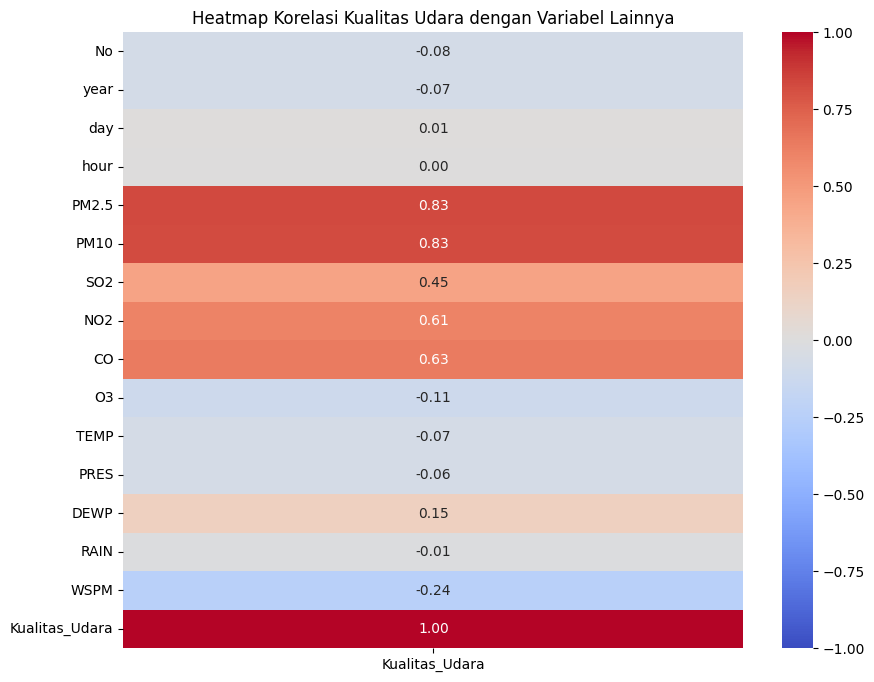

In [33]:
corr_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix[['Kualitas_Udara']], annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Heatmap Korelasi Kualitas Udara dengan Variabel Lainnya')
plt.show()

**Insight:**
- dari visualisasi di atas megambarkan ada beberapa kolom posti linear diantara nya PM2.5,PM10,NO2,CO,SO2
- xxx

### Pertanyaan 2:

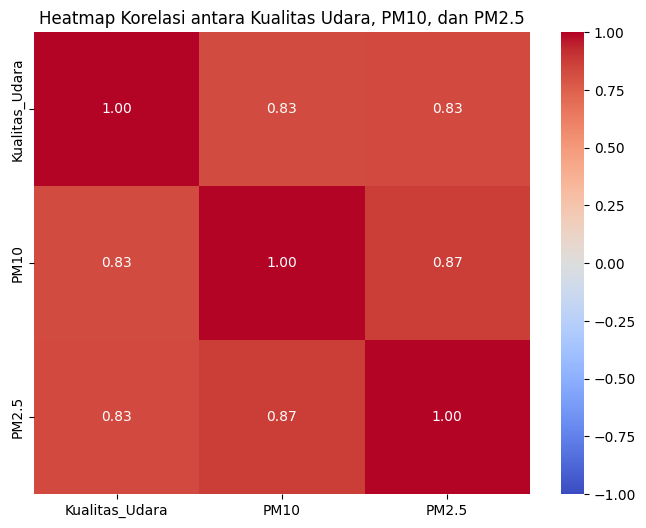

In [34]:
relevant_cols = ['Kualitas_Udara', 'PM10', 'PM2.5']
correlation_subset = corr_matrix[relevant_cols].loc[relevant_cols]
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_subset, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Heatmap Korelasi antara Kualitas Udara, PM10, dan PM2.5')
plt.show()

**Insight:**
- Bedasrkan diagram diatas menujukan bahwa  pm2.5 dan pm10 memilki pengaruh signifikan terhapan kualitas udara

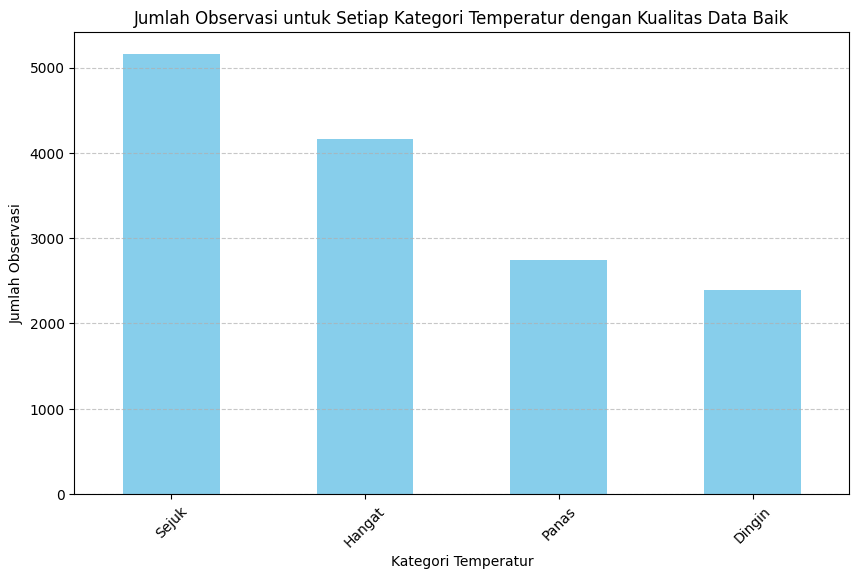

In [35]:
data_baik = data[data['Kualitas_Udara'] == 1]
temperatur_counts = data_baik['TEMP_Category'].value_counts()

plt.figure(figsize=(10, 6))
temperatur_counts.plot(kind='bar', color='skyblue')
plt.title('Jumlah Observasi untuk Setiap Kategori Temperatur dengan Kualitas Data Baik')
plt.xlabel('Kategori Temperatur')
plt.ylabel('Jumlah Observasi')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [39]:
data[data['Kualitas_Udara']==1][data.month=="Januari"]


C:\Users\Reza\AppData\Local\Temp\ipykernel_12964\3703895422.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data['Kualitas_Udara']==1][data.month=="Januari"]


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Kualitas_Udara,TEMP_Category
7344,7345,2014,Januari,1,0,20.0,90.0,18.0,62.0,0.001263,56.353358,-1.5,1007.3,-12.5,0.0,South-South-East,0.6,Aotizhongxin,1,Dingin
7351,7352,2014,Januari,1,7,31.0,93.0,24.0,69.0,0.000900,4.000000,-2.9,1007.9,-10.2,0.0,South-East,1.1,Aotizhongxin,1,Dingin
7352,7353,2014,Januari,1,8,21.0,90.0,18.0,52.0,0.000700,17.000000,0.0,1008.8,-8.5,0.0,West,1.5,Aotizhongxin,1,Dingin
7355,7356,2014,Januari,1,11,25.0,80.0,21.0,27.0,0.000700,44.000000,10.7,1009.1,-11.4,0.0,West-North-West,3.4,Aotizhongxin,1,Sejuk
7356,7357,2014,Januari,1,12,23.0,71.0,17.0,14.0,0.000500,56.000000,11.8,1008.3,-11.1,0.0,North-North-West,2.8,Aotizhongxin,1,Sejuk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34361,34362,2017,Januari,30,17,35.0,65.0,16.0,21.0,0.000500,101.000000,0.8,1029.9,-31.3,0.0,South-West,3.4,Aotizhongxin,1,Sejuk
34382,34383,2017,Januari,31,14,50.0,50.0,26.0,39.0,0.001100,81.000000,5.1,1021.9,-23.0,0.0,West-South-West,1.4,Aotizhongxin,1,Sejuk
34389,34390,2017,Januari,31,21,24.0,24.0,13.0,27.0,0.000700,76.000000,1.9,1026.4,-22.1,0.0,North-North-East,1.7,Aotizhongxin,1,Sejuk
34390,34391,2017,Januari,31,22,10.0,31.0,5.0,17.0,0.000400,80.000000,2.2,1027.5,-22.6,0.0,North-North-West,2.9,Aotizhongxin,1,Sejuk


**Insight:**
- Bedasrkkan data diatas kualitas sejuk memelki ferkuensi kualitas udara baik lebih bayak dibandin kondisi temperatur lain nya 

## Conclusion

In [ ]:
-- Faktor yang Menunjukkan Kualitas Udara:

Kualitas udara dipengaruhi oleh beberapa faktor, termasuk konsentrasi partikel halus (PM2.5), partikel kasar (PM10), dan kondisi temperatur. Konsentrasi PM2.5 dan PM10 berperan penting dalam menentukan kualitas udara karena keduanya merupakan indikator utama polusi udara.
Pengaruh PM2.5 dan PM10 Terhadap Kualitas Udara:

PM2.5: Peningkatan konsentrasi PM2.5 cenderung memiliki pengaruh yang signifikan terhadap kualitas udara. PM2.5, yang terdiri dari partikel dengan diameter kurang dari 2.5 mikrometer, dapat menembus jauh ke dalam sistem pernapasan dan menyebabkan dampak kesehatan yang serius.
PM10: Meskipun PM10 (partikel dengan diameter kurang dari 10 mikrometer) juga mempengaruhi kualitas udara, pengaruhnya terhadap kualitas udara tidak sekuat PM2.5. PM10 dapat memengaruhi kesehatan pernapasan tetapi biasanya memiliki dampak yang kurang signifikan dibandingkan PM2.5.
Kondisi Temperatur yang Menunjukkan Kualitas Udara Baik:

Berdasarkan data, kondisi temperatur sejuk menunjukkan frekuensi kualitas udara yang baik lebih banyak dibandingkan dengan kondisi temperatur lainnya. Ini menunjukkan bahwa pada suhu yang lebih sejuk, kualitas udara cenderung lebih baik, mungkin karena faktor-faktor seperti penurunan emisi polutan atau peningkatan ventilasi udara.
Insight dari Data:

Rata-rata CO Tertinggi pada Tahun 2017: Data menunjukkan bahwa rata-rata konsentrasi CO (karbon monoksida) tertinggi tercatat pada tahun 2017. Ini bisa menunjukkan peningkatan polusi atau perubahan dalam sumber emisi CO pada tahun tersebut.
Rata-rata CO Tertinggi pada Bulan Desember: Rata-rata konsentrasi CO juga tercatat tertinggi pada bulan Desember, mungkin terkait dengan peningkatan pembakaran bahan bakar fosil selama musim dingin atau aktivitas lain yang meningkatkan emisi CO.
Rata-rata Wind Direction (WD) Tertinggi pada East-North-East: Arah angin dominan dari East-North-East menunjukkan rata-rata tertinggi, yang mungkin mempengaruhi penyebaran polutan dan kualitas udara di area tersebut.
Pengaruh PM2.5 dan PM10 terhadap CO: PM2.5 memiliki pengaruh yang lebih besar terhadap nilai CO dibandingkan PM10. Ini menunjukkan bahwa konsentrasi PM2.5 dapat berkontribusi secara signifikan terhadap polusi CO di udara.
Korelasi Kualitas Udara: Terdapat beberapa kolom dalam data yang menunjukkan korelasi positif linier dengan kualitas udara, menunjukkan bahwa variabel-variabel tersebut berhubungan erat dengan kualitas udara.